##**ABOUT DATASET:-**
#Credit Card Fraud Detection
Anonymized credit card transactions labeled as fraudulent or genuine

In [ ]:
pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Classifier Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, recall_score, classification_report
from xgboost import XGBClassifier, plot_importance

In [ ]:
df = pd.read_csv("/content/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69410,53411,1.106584,-0.925436,0.661483,-1.664040,-1.075488,0.235442,-1.022176,0.343909,1.810465,...,0.302333,0.839735,-0.195164,-0.615158,0.279175,0.151560,0.047940,0.019442,68.02,0.0
69411,53411,-1.009202,-0.429729,2.109263,-0.718647,-0.389684,-0.038644,0.089580,0.314820,0.790871,...,-0.021664,-0.168552,0.282626,0.111297,-0.492715,0.779755,0.023864,0.133686,105.13,0.0
69412,53411,1.194319,0.184864,0.380408,0.373276,-0.018658,0.005934,-0.078417,0.062905,-0.296652,...,-0.190932,-0.524439,0.103525,-0.295192,0.180030,0.124729,-0.012819,0.003846,3.58,0.0
69413,53411,0.898915,-0.209692,0.537196,1.562960,-0.747575,-0.824138,0.249155,-0.168179,0.248011,...,-0.103293,-0.539026,-0.064167,0.697779,0.414650,-0.532499,-0.002198,0.054169,154.42,0.0


from matplotlib import pyplot as plt
df['Time'].plot(kind='hist', bins=20, title='Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['V1'].plot(kind='hist', bins=20, title='V1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['V2'].plot(kind='hist', bins=20, title='V2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['V3'].plot(kind='hist', bins=20, title='V3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Time', y='V1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='V1', y='V2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='V2', y='V3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='V3', y='V4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V4']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V4')

from matplotlib import pyplot as plt
df['Time'].plot(kind='line', figsize=(8, 4), title='Time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['V1'].plot(kind='line', figsize=(8, 4), title='V1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['V2'].plot(kind='line', figsize=(8, 4), title='V2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['V3'].plot(kind='line', figsize=(8, 4), title='V3')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


from matplotlib import pyplot as plt
_df_16['Time'].plot(kind='hist', bins=20, title='Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['V1'].plot(kind='hist', bins=20, title='V1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['V2'].plot(kind='hist', bins=20, title='V2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['V3'].plot(kind='hist', bins=20, title='V3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='Time', y='V1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='V1', y='V2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='V2', y='V3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='V3', y='V4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V4']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V4')

from matplotlib import pyplot as plt
_df_28['Time'].plot(kind='line', figsize=(8, 4), title='Time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['V1'].plot(kind='line', figsize=(8, 4), title='V1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['V2'].plot(kind='line', figsize=(8, 4), title='V2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['V3'].plot(kind='line', figsize=(8, 4), title='V3')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69415 entries, 0 to 69414
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    69415 non-null  int64  
 1   V1      69415 non-null  float64
 2   V2      69415 non-null  float64
 3   V3      69415 non-null  float64
 4   V4      69415 non-null  float64
 5   V5      69415 non-null  float64
 6   V6      69415 non-null  float64
 7   V7      69415 non-null  float64
 8   V8      69415 non-null  float64
 9   V9      69415 non-null  float64
 10  V10     69415 non-null  float64
 11  V11     69415 non-null  float64
 12  V12     69415 non-null  float64
 13  V13     69415 non-null  float64
 14  V14     69414 non-null  float64
 15  V15     69414 non-null  float64
 16  V16     69414 non-null  float64
 17  V17     69414 non-null  float64
 18  V18     69414 non-null  float64
 19  V19     69414 non-null  float64
 20  V20     69414 non-null  float64
 21  V21     69414 non-null  float64
 22

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,69415.000000,69415.000000,69415.000000,69415.000000,69415.000000,69415.000000,69415.000000,69415.000000,69415.000000,69415.000000,...,69414.000000,69414.000000,69414.000000,69414.000000,69414.000000,69414.000000,69414.000000,69414.000000,69414.000000,69414.000000
mean,34519.184038,-0.244558,-0.020747,0.681822,0.168990,-0.271065,0.101799,-0.115054,0.057321,0.022473,...,-0.028673,-0.106244,-0.038245,0.005947,0.136399,0.021947,0.003072,0.003233,96.982484,0.002492
std,14370.191006,1.867033,1.655570,1.420627,1.376156,1.394497,1.308084,1.261332,1.237094,1.163167,...,0.740458,0.638843,0.609758,0.596642,0.439081,0.497691,0.381873,0.321953,271.256886,0.049861
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.000000
25%,28649.000000,-1.004689,-0.592001,0.195519,-0.724951,-0.888408,-0.636397,-0.604542,-0.141264,-0.670457,...,-0.226091,-0.526662,-0.179120,-0.325917,-0.127368,-0.328800,-0.062430,-0.005830,7.640000,0.000000
50%,37791.000000,-0.242838,0.071695,0.770956,0.187901,-0.303080,-0.150180,-0.074759,0.066544,-0.069000,...,-0.060776,-0.080608,-0.051384,0.062063,0.174489,-0.074849,0.009491,0.022774,26.470000,0.000000
75%,45254.500000,1.153743,0.727593,1.403552,1.051334,0.268315,0.494961,0.420173,0.344727,0.676925,...,0.115812,0.309536,0.079192,0.403449,0.422365,0.299444,0.082493,0.075881,88.650000,0.000000
max,53411.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


from matplotlib import pyplot as plt
_df_0['Time'].plot(kind='hist', bins=20, title='Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['V1'].plot(kind='hist', bins=20, title='V1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['V2'].plot(kind='hist', bins=20, title='V2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['V3'].plot(kind='hist', bins=20, title='V3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Time', y='V1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='V1', y='V2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='V2', y='V3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='V3', y='V4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time']
  ys = series['V4']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('V4')

from matplotlib import pyplot as plt
_df_12['Time'].plot(kind='line', figsize=(8, 4), title='Time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['V1'].plot(kind='line', figsize=(8, 4), title='V1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['V2'].plot(kind='line', figsize=(8, 4), title='V2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['V3'].plot(kind='line', figsize=(8, 4), title='V3')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,V15,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Time
Total,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.001441,0.001441,0.001441,0.001441,0.001441,0.001441,0.001441,0.001441,0.001441,0.001441,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
duplicated_values = df[df.duplicated()]
print(duplicated_values)

        Time        V1        V2        V3        V4        V5        V6  \
33        26 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35        26 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113       74  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114       74  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115       74  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...      ...       ...       ...       ...       ...       ...       ...   
63209  50608 -0.988271 -0.932178  1.717482 -1.694737  0.957518 -1.149287   
66601  52127  1.086164  0.093622  0.501010  1.496840 -0.372806 -0.366468   
66603  52127  1.121034  0.151243  0.521250  1.482178 -0.355005 -0.372963   
68899  53183 -3.294421  2.012037 -0.638100 -1.216179 -1.159612 -1.035571   
68901  53183 -2.518832  3.233574 -1.180463 -1.516301 -3.917682  0.839866   

             V7        V8        V9  ...       V21       V22       V23  \
33     0.7112

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69151 entries, 0 to 69414
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    69151 non-null  int64  
 1   V1      69151 non-null  float64
 2   V2      69151 non-null  float64
 3   V3      69151 non-null  float64
 4   V4      69151 non-null  float64
 5   V5      69151 non-null  float64
 6   V6      69151 non-null  float64
 7   V7      69151 non-null  float64
 8   V8      69151 non-null  float64
 9   V9      69151 non-null  float64
 10  V10     69151 non-null  float64
 11  V11     69151 non-null  float64
 12  V12     69151 non-null  float64
 13  V13     69151 non-null  float64
 14  V14     69150 non-null  float64
 15  V15     69150 non-null  float64
 16  V16     69150 non-null  float64
 17  V17     69150 non-null  float64
 18  V18     69150 non-null  float64
 19  V19     69150 non-null  float64
 20  V20     69150 non-null  float64
 21  V21     69150 non-null  float64
 22  V22

In [ ]:
df['Class'].value_counts()

Class
0.0    68977
1.0      173
Name: count, dtype: int64

In [ ]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')


No Frauds 99.75 % of the dataset
Frauds 0.25 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

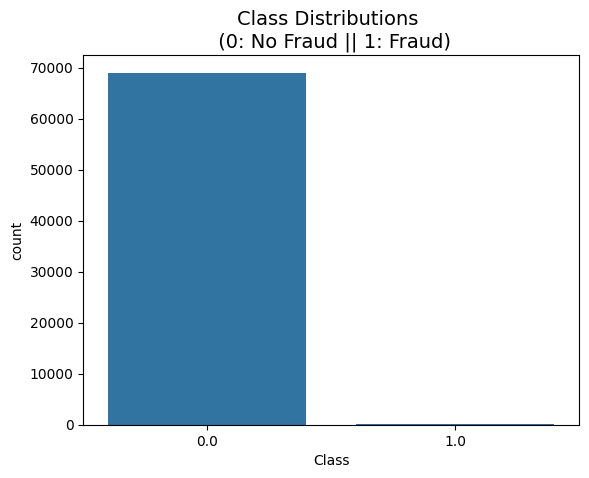

In [ ]:
sns.countplot(x='Class',data = df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)


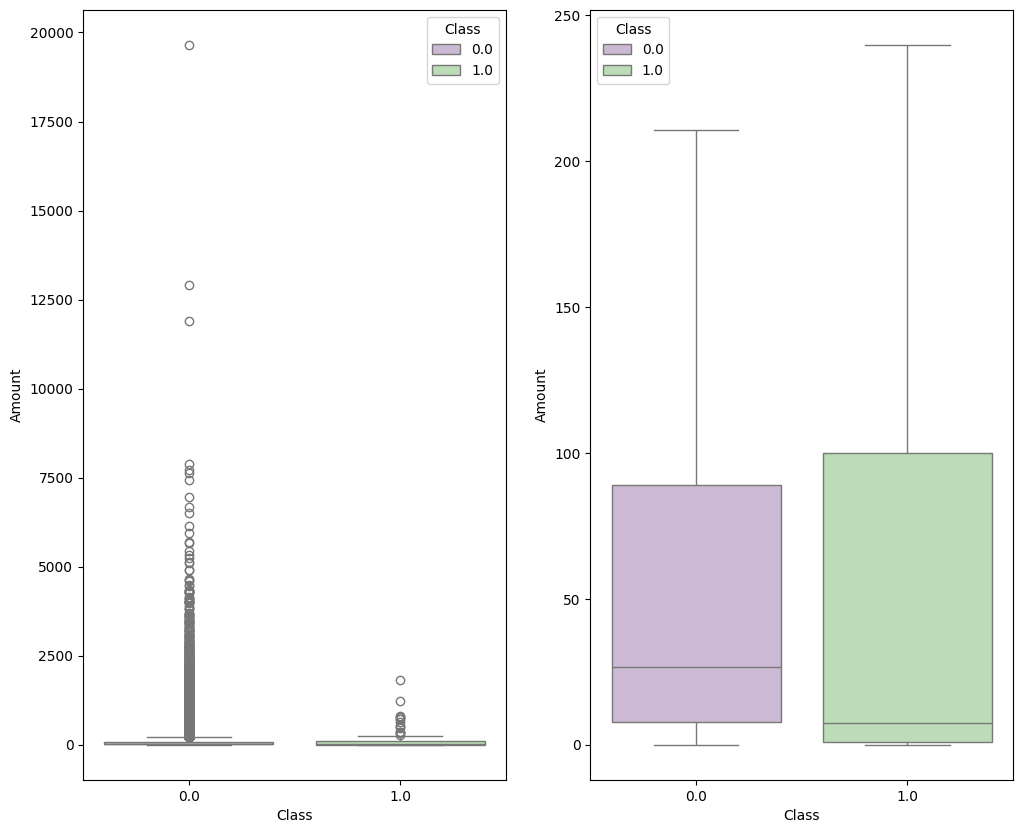

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,10))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show()

In [ ]:
tmp = df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    68977.000000
mean        97.174276
std        271.772274
min          0.000000
25%          7.680000
50%         26.620000
75%         88.900000
max      19656.530000
Name: Amount, dtype: float64

In [ ]:
class_1.describe()

count     173.00000
mean       95.72237
std       221.11352
min         0.00000
25%         1.00000
50%         7.58000
75%        99.99000
max      1809.68000
Name: Amount, dtype: float64

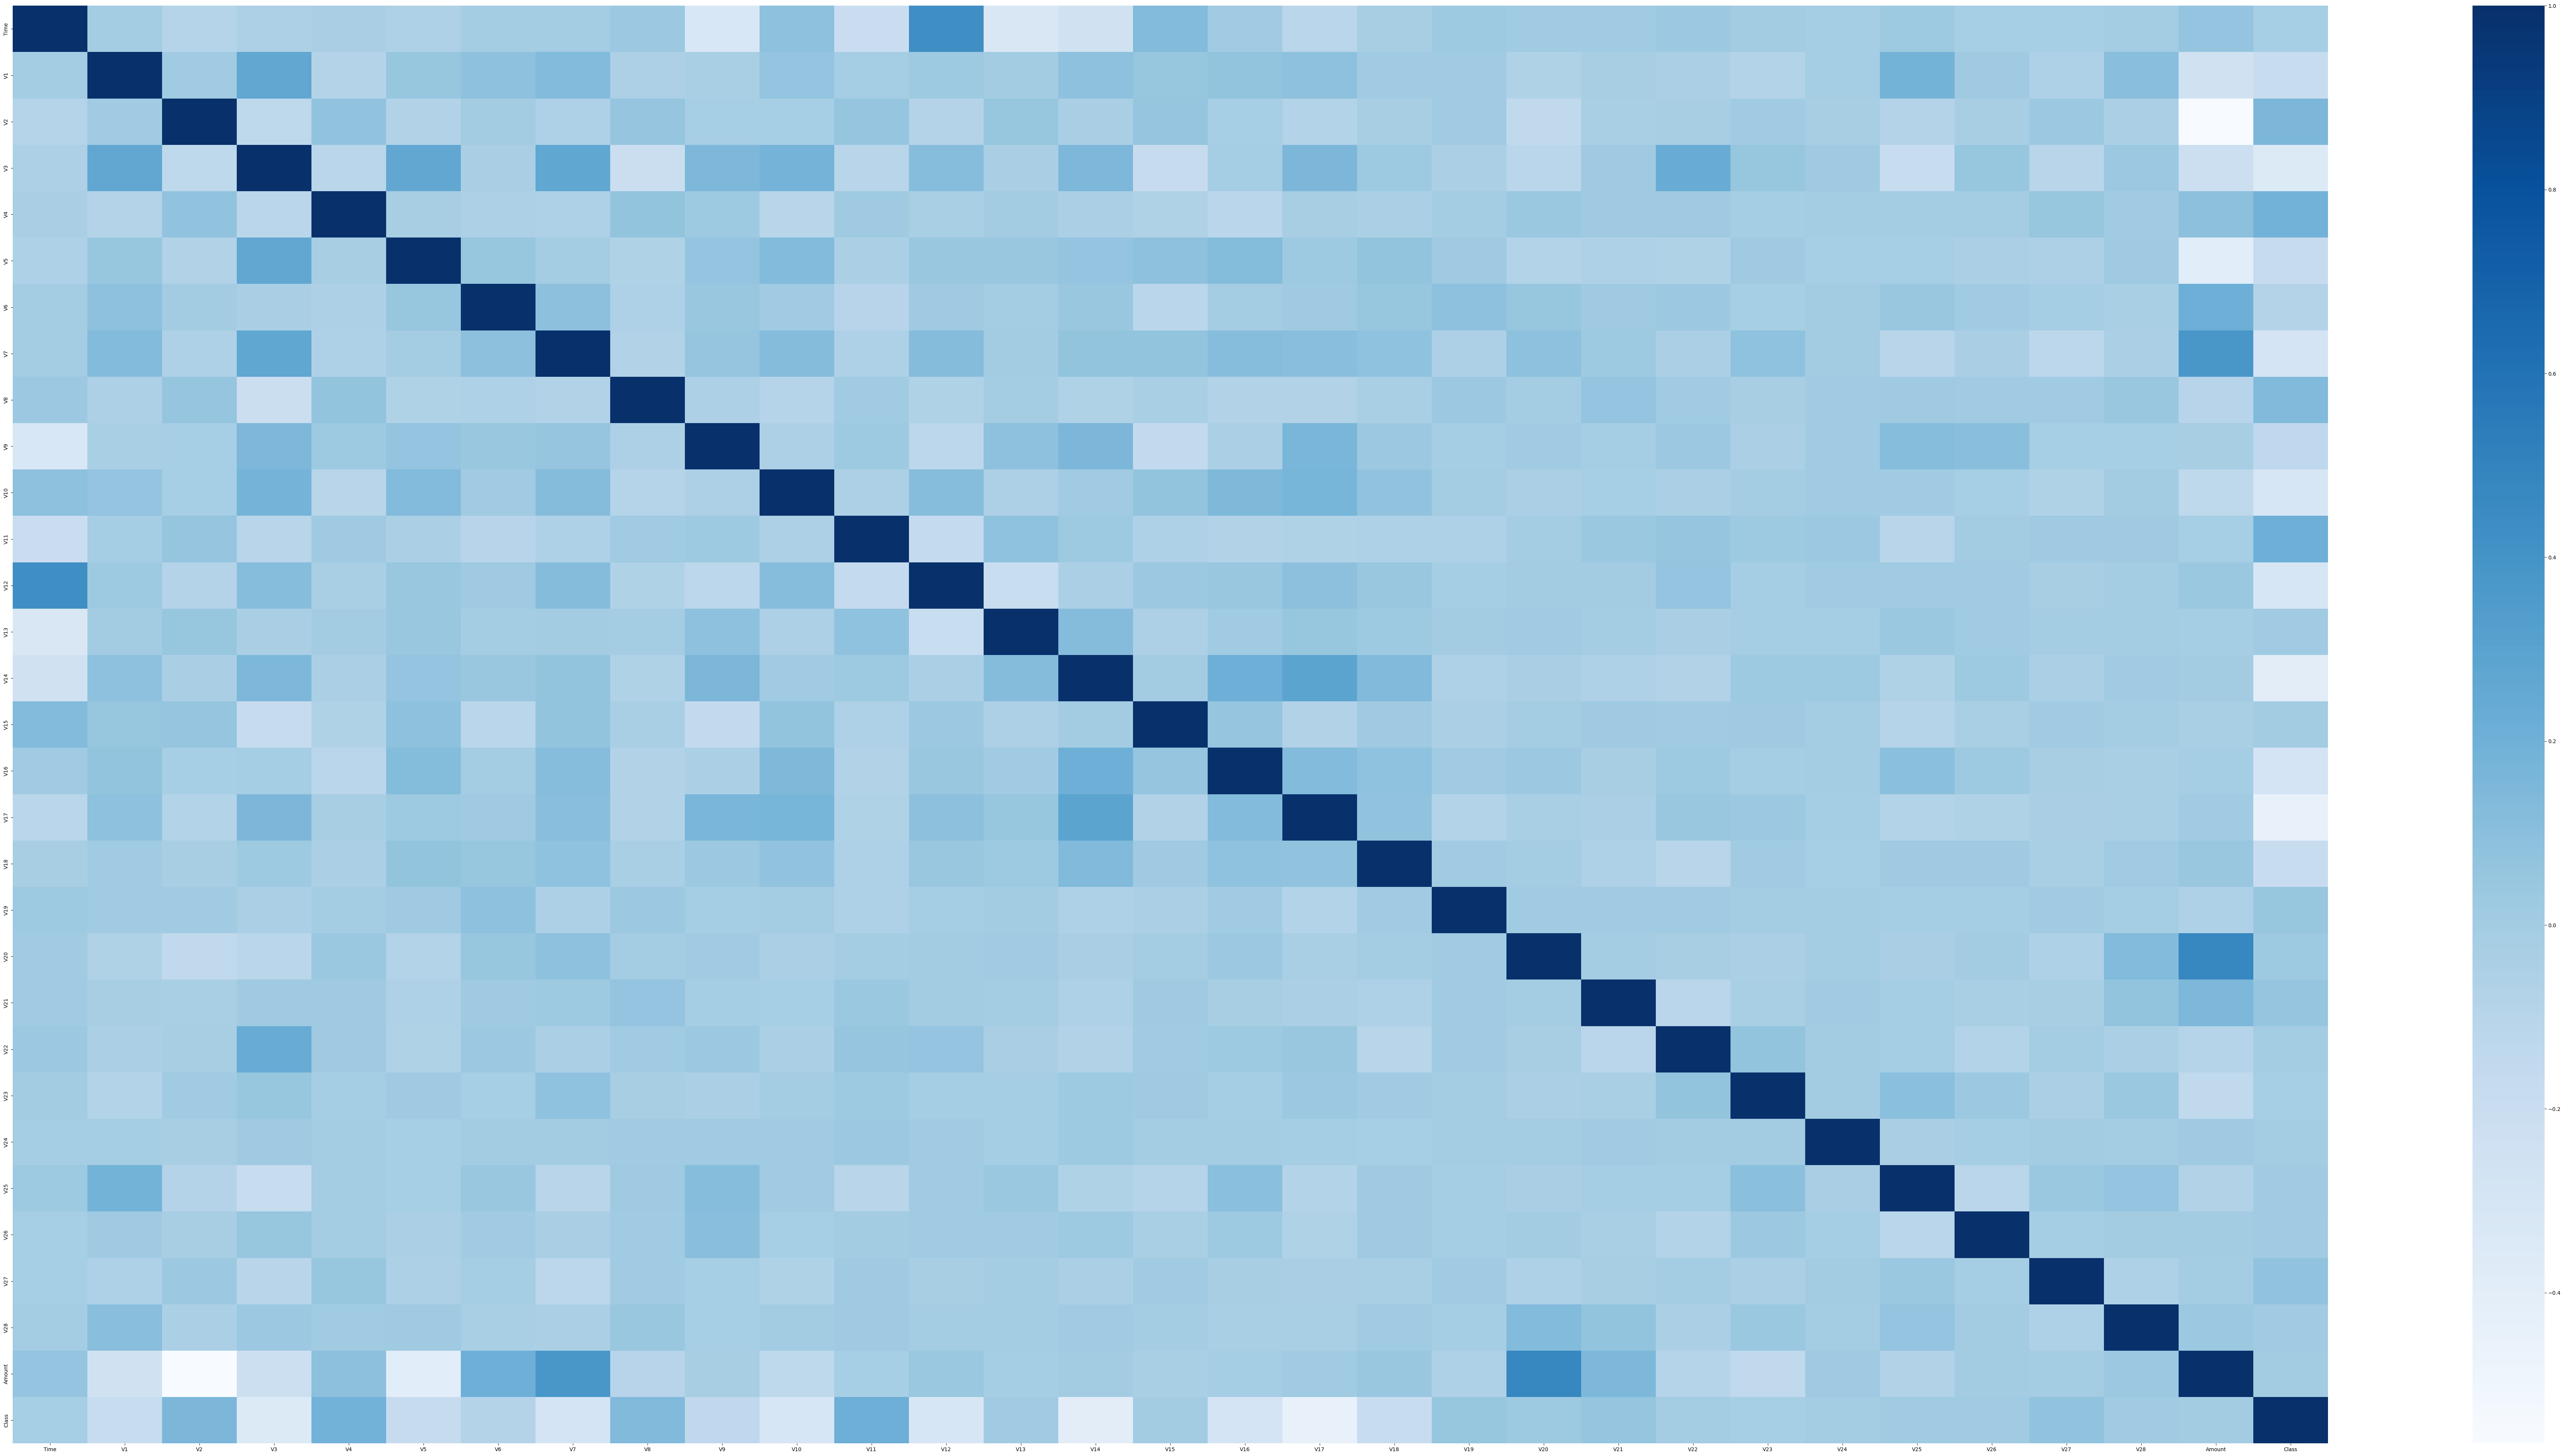

In [ ]:
plt.figure(figsize=(100,50))
dataplot = sns.heatmap(df.corr(), cmap="Blues")
plt.show()

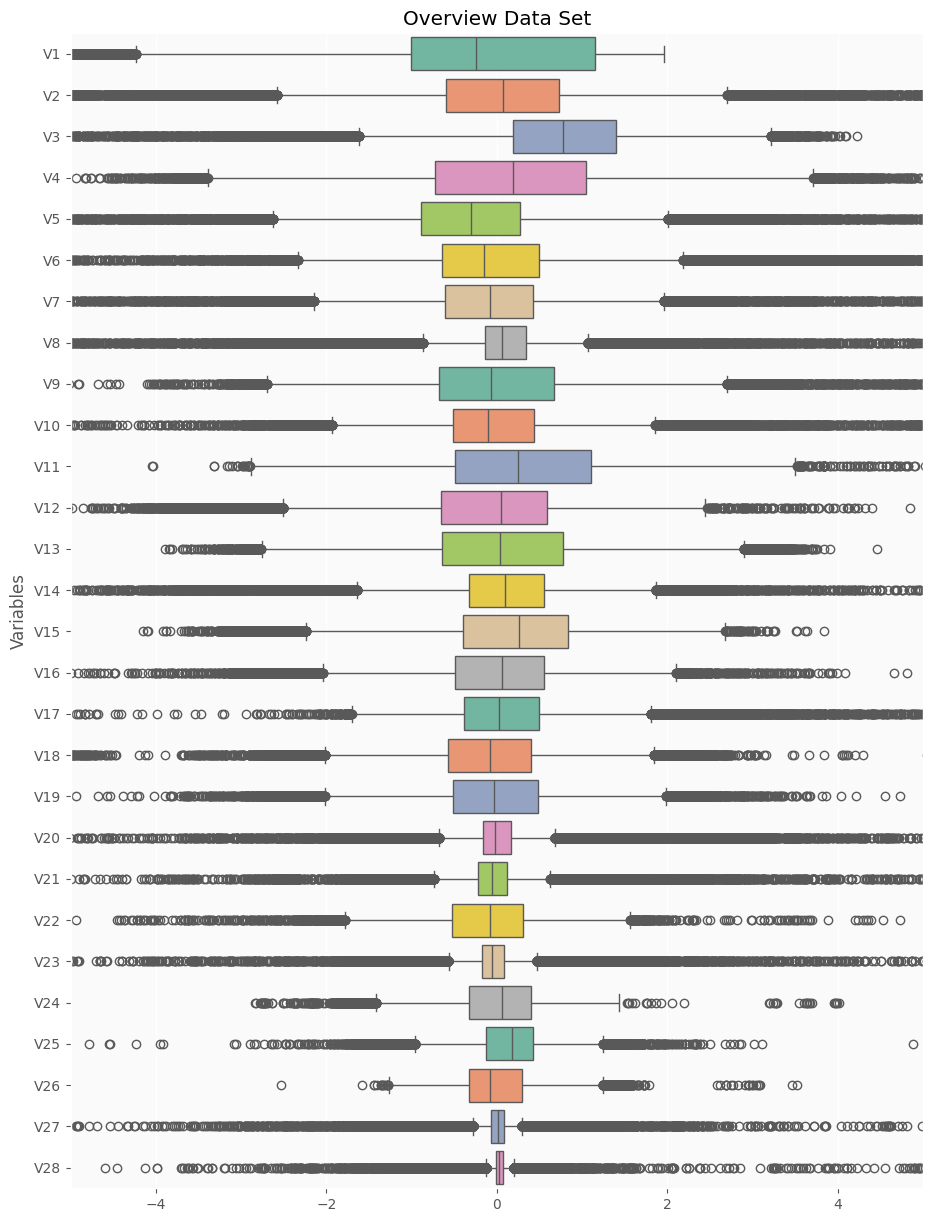

In [ ]:
plt.style.use('ggplot') # Using ggplot2 style visuals

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-5, 5))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df.drop(columns=['Amount', 'Class', 'Time']),
  orient = 'h',
  palette = 'Set2')

In [ ]:
x = df.drop('Class', axis='columns')
y = df['Class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
missing_values = x_train.isnull().sum()
print(missing_values)
x_train = x_train.dropna()
y_train = y_train[x_train.index]
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
x_train = imputer.fit_transform(x_train)
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_predicted = lr_model.predict(x_test)
y_predicted = lr_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13802
         1.0       1.00      0.90      0.95        29

    accuracy                           1.00     13831
   macro avg       1.00      0.95      0.97     13831
weighted avg       1.00      1.00      1.00     13831



In [ ]:
confusion_m = confusion_matrix(y_test, y_pred)
confusion_m

array([[13802,     0],
       [    3,    26]])

<Axes: >

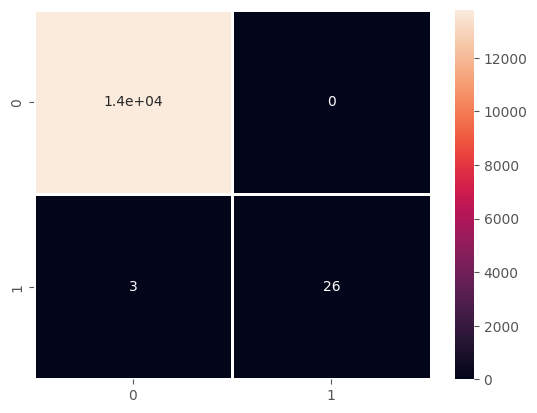

In [ ]:
sns.heatmap(confusion_m, annot=True, linecolor='white', linewidths=1)

<Figure size 10000x5000 with 0 Axes>

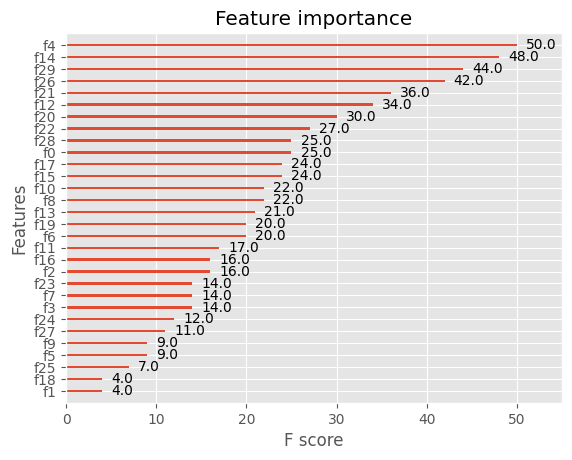

In [ ]:
plt.figure(figsize=(100,50))
plot_importance(xgb)
plt.show()